In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

603

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=eae6741fe514cd595acbb7046ce93c6b


In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yerbogachen
Processing Record 2 of Set 1 | karaul
City not found. Skipping...
Processing Record 3 of Set 1 | beloha
Processing Record 4 of Set 1 | new norfolk
Processing Record 5 of Set 1 | arraial do cabo
Processing Record 6 of Set 1 | domoni
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | saint-pierre
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | college
Processing Record 11 of Set 1 | tungkang
City not found. Skipping...
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | longyearbyen
Processing Record 14 of Set 1 | plettenberg bay
Processing Record 15 of Set 1 | roald
Processing Record 16 of Set 1 | dikson
Processing Record 17 of Set 1 | tigzirt
Processing Record 18 of Set 1 | paradwip
City not found. Skipping...
Processing Record 19 of Set 1 | veraval
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | 

Processing Record 35 of Set 4 | geraldton
Processing Record 36 of Set 4 | pakala
Processing Record 37 of Set 4 | cusuna
Processing Record 38 of Set 4 | padang
Processing Record 39 of Set 4 | tabiauea
City not found. Skipping...
Processing Record 40 of Set 4 | lorengau
Processing Record 41 of Set 4 | sainte-anne-des-monts
Processing Record 42 of Set 4 | ambodifototra
City not found. Skipping...
Processing Record 43 of Set 4 | egvekinot
Processing Record 44 of Set 4 | harper
Processing Record 45 of Set 4 | coquimbo
Processing Record 46 of Set 4 | bardiyah
Processing Record 47 of Set 4 | rahatgarh
Processing Record 48 of Set 4 | san pedro
Processing Record 49 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 50 of Set 4 | port alfred
Processing Record 1 of Set 5 | bathsheba
Processing Record 2 of Set 5 | lexington
Processing Record 3 of Set 5 | salekhard
Processing Record 4 of Set 5 | waw
Processing Record 5 of Set 5 | necochea
Processing Record 6 of Set 5 | bilma
Proc

Processing Record 24 of Set 8 | prado
Processing Record 25 of Set 8 | saint anthony
Processing Record 26 of Set 8 | cuenca
Processing Record 27 of Set 8 | praia da vitoria
Processing Record 28 of Set 8 | utiroa
City not found. Skipping...
Processing Record 29 of Set 8 | sao joao da barra
Processing Record 30 of Set 8 | labuhan
Processing Record 31 of Set 8 | pisco
Processing Record 32 of Set 8 | vao
Processing Record 33 of Set 8 | hambantota
Processing Record 34 of Set 8 | gambela
Processing Record 35 of Set 8 | linares
Processing Record 36 of Set 8 | vila franca do campo
Processing Record 37 of Set 8 | rupert
Processing Record 38 of Set 8 | bugene
Processing Record 39 of Set 8 | komsomolskiy
Processing Record 40 of Set 8 | mocambique
City not found. Skipping...
Processing Record 41 of Set 8 | clyde river
Processing Record 42 of Set 8 | vila
Processing Record 43 of Set 8 | elat
Processing Record 44 of Set 8 | bonito
Processing Record 45 of Set 8 | henties bay
Processing Record 46 of Se

Processing Record 18 of Set 12 | nanchang
Processing Record 19 of Set 12 | lokosovo
Processing Record 20 of Set 12 | varzob
Processing Record 21 of Set 12 | atherton
Processing Record 22 of Set 12 | flinders
Processing Record 23 of Set 12 | bauchi
Processing Record 24 of Set 12 | beaumont
Processing Record 25 of Set 12 | jiddah
City not found. Skipping...
Processing Record 26 of Set 12 | polovinnoye
Processing Record 27 of Set 12 | bijie
Processing Record 28 of Set 12 | touros
Processing Record 29 of Set 12 | xichang
Processing Record 30 of Set 12 | weligama
Processing Record 31 of Set 12 | amahai
Processing Record 32 of Set 12 | little current
Processing Record 33 of Set 12 | ukiah
Processing Record 34 of Set 12 | sukhoverkovo
City not found. Skipping...
Processing Record 35 of Set 12 | pratapgarh
Processing Record 36 of Set 12 | alta gracia
Processing Record 37 of Set 12 | nemuro
Processing Record 38 of Set 12 | puerto narino
Processing Record 39 of Set 12 | tyukod
Processing Record 

In [14]:
len(city_data)

556

In [15]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yerbogachen,61.2767,108.0108,28.22,98,100,3.69,RU,2022-04-06 22:35:55
1,Beloha,-25.1667,45.0500,72.07,94,22,1.57,MG,2022-04-06 22:35:57
2,New Norfolk,-42.7826,147.0587,51.93,69,0,2.06,AU,2022-04-06 22:35:57
3,Arraial Do Cabo,-22.9661,-42.0278,75.16,94,75,11.50,BR,2022-04-06 22:35:58
4,Domoni,-12.2569,44.5319,79.11,83,73,2.80,KM,2022-04-06 22:35:58
5,Ushuaia,-54.8000,-68.3000,40.66,70,40,23.02,AR,2022-04-06 22:35:58
6,Saint-Pierre,-21.3393,55.4781,78.48,81,100,17.27,RE,2022-04-06 22:35:59
7,Tuktoyaktuk,69.4541,-133.0374,12.20,73,75,9.22,CA,2022-04-06 22:35:59
8,College,64.8569,-147.8028,42.75,48,75,10.36,US,2022-04-06 22:36:00
9,Mataura,-46.1927,168.8643,50.00,60,96,3.49,NZ,2022-04-06 22:36:00


In [16]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [18]:
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Yerbogachen,RU,2022-04-06 22:35:55,61.2767,108.0108,28.22,98,100,3.69
1,Beloha,MG,2022-04-06 22:35:57,-25.1667,45.0500,72.07,94,22,1.57
2,New Norfolk,AU,2022-04-06 22:35:57,-42.7826,147.0587,51.93,69,0,2.06
3,Arraial Do Cabo,BR,2022-04-06 22:35:58,-22.9661,-42.0278,75.16,94,75,11.50
4,Domoni,KM,2022-04-06 22:35:58,-12.2569,44.5319,79.11,83,73,2.80
5,Ushuaia,AR,2022-04-06 22:35:58,-54.8000,-68.3000,40.66,70,40,23.02
6,Saint-Pierre,RE,2022-04-06 22:35:59,-21.3393,55.4781,78.48,81,100,17.27
7,Tuktoyaktuk,CA,2022-04-06 22:35:59,69.4541,-133.0374,12.20,73,75,9.22
8,College,US,2022-04-06 22:36:00,64.8569,-147.8028,42.75,48,75,10.36
9,Mataura,NZ,2022-04-06 22:36:00,-46.1927,168.8643,50.00,60,96,3.49


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

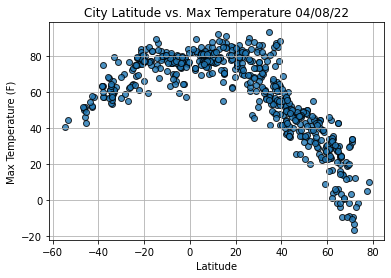

In [21]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

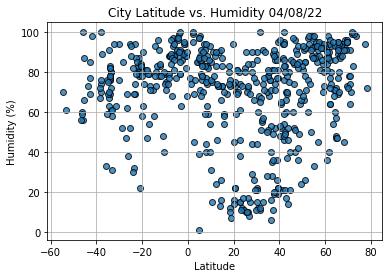

In [22]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

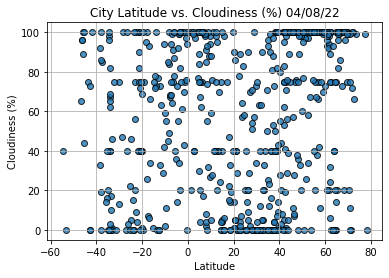

In [23]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

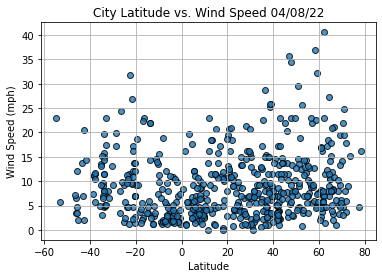

In [24]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()